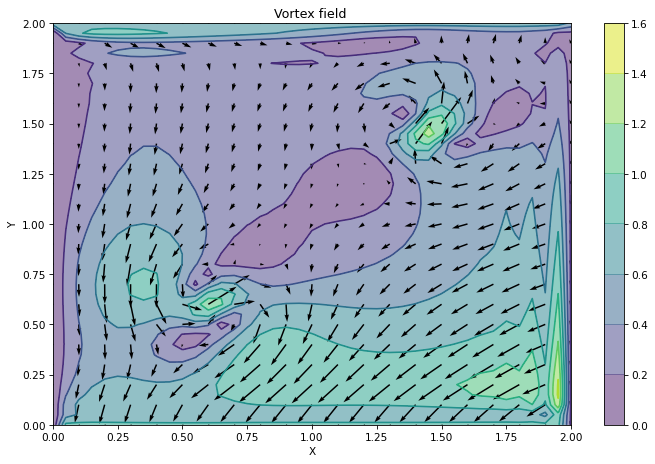

In [7]:
import numpy as np
import matplotlib.pyplot as plt
nx = 41  # брой квадрати по х
ny = 41  # брой квадрати по y
nt = 500  # момент от времето в който искаш решението
nit = 50  # релаксационно време за налягането 
c = 1     # speed of waves
dx = 2 / (nx - 1)   # differential elements 
dy = 2 / (ny - 1)
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x, y)

rho = 1     #paramters of the fluid
nu = .1
dt = .001  #diff. element

u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx)) 
b = np.zeros((ny, nx))

# Функциите b и pressure са вътрешни за flow  не се калват извън flow

def build_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))

    return b



def pressure(p, dx, dy, b):
    pn = np.empty_like(p)
    pn = p.copy()
    
    for q in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = (((pn[1:-1, 2:] + pn[1:-1, 0:-2]) * dy**2 + 
                          (pn[2:, 1:-1] + pn[0:-2, 1:-1]) * dx**2) /
                          (2 * (dx**2 + dy**2)) -
                          dx**2 * dy**2 / (2 * (dx**2 + dy**2)) * 
                          b[1:-1,1:-1])

        p[:, -1] = 0.08 ##dp/dy = 0 at x = 2
        p[0, :] = p[1, :]  ##dp/dy = 0 at y = 0
        p[:, 0] = p[:, 1]    ##dp/dx = 0 at x = 0
        p[-1, :] = 0.07        ##p = 1 at y = 2
        
    return p

# Функцията flow иска от теб момент във времето в който ти трябва решението u,v трябва да са просто масиви с нули с размерности ny,nx, dt е промяната във времето
#  dx,dy са разстоянията между квадратите ако искаш да ги променяш ще трябва да промениш и dt обратно пропорционално,p е празен масив за налягането
#  също с размерностите на u,rho,nu са хиперпараметри плътност и визкозитет може да си играеш с тях за да решиш задачата за друг флуид

# Функцията връща два масива които са скоростите по х и по у за дадения момент от време на всички точки 
def flow(nt, u, v, dt, dx, dy, p, rho, nu):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    f = np.zeros((ny, nx))
    
    for n in range(nt):
        for mu in range(3):
         f[12][11+mu]=abs(math.sin(2*math.pi*n/200)*(u[12][11+mu]+v[12][11+mu])/17.)
         f[29][28+mu]=abs(math.sin(2*math.pi*n/200)*(u[29][28+mu]+v[29][28+mu])/17.)
         f[11+mu][12]=abs(math.sin(2*math.pi*n/200)*(u[11+mu][12]+v[11+mu][12])/17.)
         f[28+mu][29]=abs(math.sin(2*math.pi*n/200)*(u[28+mu][29]+v[28+mu][29])/17.)
        un = u.copy()
        vn = v.copy()
        
        b = build_b(b, rho, dt, u, v, dx, dy)
        p = pressure(p, dx, dy, b)
        
        u[1:-1, 1:-1] = (un[1:-1, 1:-1]-
                         un[1:-1, 1:-1] * dt / dx *
                        (un[1:-1, 1:-1] - un[1:-1, 0:-2]) -
                         vn[1:-1, 1:-1] * dt / dy *
                        (un[1:-1, 1:-1] - un[0:-2, 1:-1]) -
                         dt / (2 * rho * dx) * (p[1:-1, 2:] - p[1:-1, 0:-2]) +
                         nu * (dt / dx**2 *
                        (un[1:-1, 2:] - 2 * un[1:-1, 1:-1] + un[1:-1, 0:-2]) +
                         dt / dy**2 *
                        (un[2:, 1:-1] - 2 * un[1:-1, 1:-1] + un[0:-2, 1:-1])))+f[1:-1,1:-1]

        v[1:-1,1:-1] = (vn[1:-1, 1:-1] -
                        un[1:-1, 1:-1] * dt / dx *
                       (vn[1:-1, 1:-1] - vn[1:-1, 0:-2]) -
                        vn[1:-1, 1:-1] * dt / dy *
                       (vn[1:-1, 1:-1] - vn[0:-2, 1:-1]) -
                        dt / (2 * rho * dy) * (p[2:, 1:-1] - p[0:-2, 1:-1]) +
                        nu * (dt / dx**2 *
                       (vn[1:-1, 2:] - 2 * vn[1:-1, 1:-1] + vn[1:-1, 0:-2]) +
                        dt / dy**2 *
                       (vn[2:, 1:-1] - 2 * vn[1:-1, 1:-1] + vn[0:-2, 1:-1])))+f[1:-1,1:-1]

        u[0, :] = 0.07*math.sin(2*math.pi*n/400)*8.
        u[:, 0] = 0.03*math.cos(2*math.pi*n/400)*8.
        u[:, -1] = -0.069*pow(math.cos(2*math.pi*n/600),3)*8.
        u[-1, :] = -0.1*pow(math.sin(2*math.pi*n/600),3)*8.   #set velocity on cavity lid equal to 1
        v[0, :] = -0.08*pow(math.sin(2*math.pi*n/400),3)*8.
        v[:, 0]=0.1*pow(math.cos(2*math.pi*n/400),3)*8.
        v[-1, :] = -0.071*math.sin(2*math.pi*n/600)*8.
        v[:, -1] = 0.035*math.cos(2*math.pi*n/600)*8.
        
        
    return u, v

p = np.zeros((ny, nx))
b = np.zeros((ny, nx))
zi = np.zeros((ny, nx))
u, v = cavity_flow(nt, u, v, dt, dx, dy, p, rho, nu)
zi[:]=np.sqrt(pow(v[:],2)+pow(u[:],2))
fig = plt.figure(figsize=(11,7), dpi=76)
plt.contourf(X, Y, zi, alpha=0.5, cmap=cm.viridis)  
plt.colorbar()                                                       
# plotting the velocity field outlines
plt.contour(X, Y, zi, cmap=cm.viridis)  
# plotting velocity field
plt.quiver(X[::2, ::2], Y[::2, ::2], u[::2, ::2], v[::2, ::2]) 
plt.xlabel('X')
plt.ylabel('Y');
z='Vortex field '
plt.title(z)
plt.show();
